In [1]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


#IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df= pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#HANDLING CATEGORICAL DATA

In [4]:
datasets = pd.read_csv('insurance.csv')
#We must convert this categorical data into nominal data, we will use LabelEncoder for that
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df.sex.drop_duplicates())
list(le.classes_)
df.sex = le.transform(df.sex)
le.fit(df.smoker.drop_duplicates())
list(le.classes_)
df.smoker = le.transform(df.smoker)
le.fit(df.region.drop_duplicates())
list(le.classes_)
df.region = le.transform(df.region)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#GRAPHS

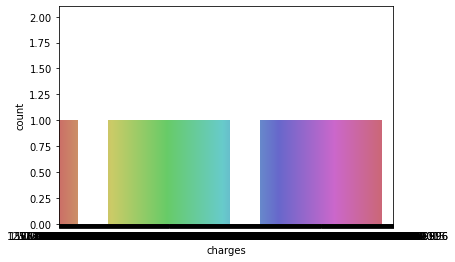

In [5]:
seaborn.countplot(x='charges',data=df, palette='hls')
plt.show()


X = df.drop(['charges','region'], axis = 1)
y = df.charges


#SPLITTING OF DATASET INTO TRAIN AND TEST SET

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((1003, 5), (1003,), (335, 5), (335,))

#NORMALIZING DATA

In [7]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#ALGORITHM

In [8]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100, criterion = 'mse', random_state = 1, n_jobs = -1)

#FITTING OF TRAINING DATA

In [9]:
forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [10]:
y_predictions = forest.predict(X_test)

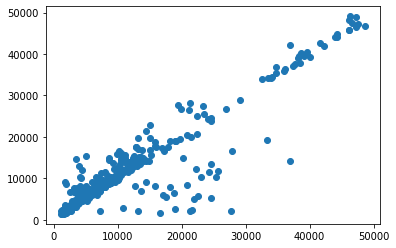

In [11]:
plt.scatter(y_test,y_predictions)

#EVALUATION

In [12]:
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_predictions)    # initialise a matrix full with zeros
y_pred_classes[y_predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(y_predictions)
y_test_classes[y_test > cutoff] = 1
print(metrics.accuracy_score(y_test_classes, y_pred_classes))

1.0


In [13]:
print(metrics.accuracy_score(y_test_classes, y_pred_classes))

1.0


#SAVING THE MODEL USING PICKLE LIBRARY

In [14]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(forest) 

# Load the pickled model 
model_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
model_from_pickle.predict(X_test) 


array([11659.1023871 ,  5631.5938381 , 44934.5380169 ,  1404.625635  ,
       14959.5194431 ,  1950.094118  ,  8216.2761936 , 15572.5856137 ,
        2400.1910587 , 12116.5528794 ,  8574.7205828 , 14163.5863448 ,
       36461.711937  , 38944.4424423 , 14309.718854  , 12665.4833301 ,
       47572.7447321 ,  8700.1668856 , 36824.1550203 ,  6324.4325345 ,
        1486.732594  , 22892.704664  ,  4597.3774772 ,  7828.7606859 ,
        3259.2954524 ,  5035.1715819 ,  2193.905684  , 17164.1826423 ,
        3101.8508165 , 37868.2429882 ,  8143.6939232 , 24632.6307156 ,
       11426.9618673 , 18945.1968786 , 28836.9972895 ,  2344.671234  ,
        6045.4325592 , 11609.6988271 , 14824.5157299 , 15279.8083473 ,
        4804.999913  , 17574.9963936 ,  5374.2023655 , 24247.448842  ,
       12745.409564  , 42013.6569135 ,  5350.8673567 ,  7910.4578672 ,
        7563.2654494 ,  8896.5767108 , 39417.2253835 ,  4733.2962192 ,
       39527.300149  , 17781.9597765 , 16555.5302298 ,  4131.8772065 ,
      

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix

In [15]:
y_train = y_train[0:335]
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_predictions)    # initialise a matrix full with zeros
y_pred_classes[y_predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_train_classes = np.zeros_like(y_predictions)
y_train_classes[y_train > cutoff] = 1

results =confusion_matrix(y_train_classes, y_pred_classes)
print(results)

[[335]]


Precision, Recall, Support, Fscore

In [16]:

cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_predictions)    # initialise a matrix full with zeros
y_pred_classes[y_predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_train_classes = np.zeros_like(y_predictions)
y_train_classes[y_train > cutoff] = 1

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_train_classes, y_pred_classes, average='macro')

(1.0, 1.0, 1.0, None)

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [17]:

cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_predictions)    # initialise a matrix full with zeros
y_pred_classes[y_predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(y_predictions)
y_test_classes[y_test > cutoff] = 1

results =confusion_matrix(y_test_classes, y_pred_classes)
print(results)

[[335]]


Precision, Recall, Support, Fscore

In [18]:

cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_predictions)    # initialise a matrix full with zeros
y_pred_classes[y_predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(y_predictions)
y_test_classes[y_test > cutoff] = 1


from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test_classes, y_pred_classes, average='macro')

(1.0, 1.0, 1.0, None)